In [182]:
from collections import Counter # Keep track of our term counts
import pandas as pd # For converting results to a dataframe and bar chart plots
import json # For parsing json
from datetime import datetime as dt
%matplotlib inline
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go 
import matplotlib.pyplot as plt
import string
import random
import numpy as np

In [106]:
df = pd.read_csv('activity_mec_info_2020-10-17.csv') #contains clothing and footwear
df = df.rename(columns={'Unnamed: 0': 'Product_name'})

In [107]:
df

,Product_name,Brand,Current_price,Discount,Avg_review_outof5,Num_reviews,Product_category,Date_retrieved
0,Yeti Roadie 20 Cooler,Yeti,280,0,4.8,3719,camping-and-hiking,2020-10-17
1,MEC Double Hammock with Tree Straps,MEC,99.95,0,4.7,6,camping-and-hiking,2020-10-17
2,MEC Camper 4-Person Tent,MEC,349.95,0,4,20,camping-and-hiking,2020-10-17
3,Backpacker's Pantry Pad Thai,Backpacker's Pantry,12,0,4.2,54,camping-and-hiking,2020-10-17
4,Helinox Savanna Chair,Helinox,259.95,0,4,2,camping-and-hiking,2020-10-17
...,...,...,...,...,...,...,...,...
6320,Grivel Tech Leash,Grivel,21.93,33,1,2,climbing,2020-10-17
6321,Petzl Ice Pick,Petzl,84.95,0,1,2,climbing,2020-10-17
6322,Gregory Denali 75 Backpack - Unisex,Gregory,439.95,0,1,2,climbing,2020-10-17
6323,Kombi Timeless Mitts - Men's,Kombi,94.95,0,2.5,6,climbing,2020-10-17


In [347]:
a = pd.to_numeric(df['Current_price'], errors='coerce')
b = pd.to_numeric(df['Discount'], errors='coerce')
c = pd.to_numeric(df['Avg_review_outof5'], errors='coerce')
d = pd.to_numeric(df['Num_reviews'], errors='coerce')
e = pd.to_datetime(df['Date_retrieved'], errors='coerce')

df['Current_price'] = a
df['Discount'] = b
df['Avg_review_outof5'] = c
df['Num_reviews'] = d
df['Date_retrieved'] = e

df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2454 entries, 0 to 2453
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         2446 non-null   object        
 1   Brand              2454 non-null   object        
 2   Current_price      2446 non-null   float64       
 3   Discount           2446 non-null   float64       
 4   Avg_review_outof5  2446 non-null   float64       
 5   Num_reviews        2446 non-null   float64       
 6   Product_category   2454 non-null   object        
 7   Subcategory        2454 non-null   object        
 8   Date_retrieved     2446 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 172.7+ KB


In [109]:
df.index

RangeIndex(start=0, stop=6325, step=1)

In [348]:
df['Discount_percent'] = 1 - (df[('Discount')] / 100)

df['MSRP'] = df['Current_price'] / df[('Discount_percent')]

df

,Unnamed: 0,Brand,Current_price,Discount,Avg_review_outof5,Num_reviews,Product_category,Subcategory,Date_retrieved,Discount_percent,MSRP
0,Aeropress Coffee & Espresso Maker,Aeropress,44.00,0.0,4.5,51.0,camping-and-hiking,kitchen-and-hydration,2020-10-20,1.0,44.00
1,Yeti Rambler 20 Vacuum Mag Slider Tumbler,Yeti,40.00,0.0,4.7,29586.0,camping-and-hiking,kitchen-and-hydration,2020-10-20,1.0,40.00
2,MSR PocketRocket 2 Stove,MSR,59.95,0.0,4.5,28.0,camping-and-hiking,kitchen-and-hydration,2020-10-20,1.0,59.95
3,Snow Peak Field Oven,Snow Peak,272.93,30.0,0.0,0.0,camping-and-hiking,kitchen-and-hydration,2020-10-20,0.7,389.90
4,Ooni Koda Pizza Oven,Ooni,438.95,0.0,4.5,6.0,camping-and-hiking,kitchen-and-hydration,2020-10-20,1.0,438.95
...,...,...,...,...,...,...,...,...,...,...,...
2449,Rab Expedition 1000 -30C Down Sleeping Bag - U...,Rab,949.95,0.0,0.0,0.0,camping-and-hiking,sleeping-bags-and-pads,2020-10-20,1.0,949.95
2450,Therm-a-Rest WingLock Valve Repair Kit,Therm-a-Rest,19.95,0.0,0.0,0.0,camping-and-hiking,sleeping-bags-and-pads,2020-10-20,1.0,19.95
2451,SEA TO SUMMIT Comfort Light Insulated Sleeping...,SEA,259.95,0.0,0.0,0.0,camping-and-hiking,sleeping-bags-and-pads,2020-10-20,1.0,259.95
2452,The North Face Eco Trail Down -7C Sleeping Bag...,The North Face,279.99,0.0,0.0,0.0,camping-and-hiking,sleeping-bags-and-pads,2020-10-20,1.0,279.99


In [111]:
list(df[df['Product_name'].isnull()].index)

[2596, 3975, 5022, 5535]

In [112]:
for num in list(df[df['Product_name'].isnull()].index):
    df = df.drop(index = num)

In [113]:
list(df[df['Product_name'].isnull()].index)

[]

In [114]:
df['Product_category'].unique()

array(['camping-and-hiking', 'cycling', 'snow', 'watersports', 'climbing'],
      dtype=object)

In [115]:
df['Brand'].nunique()

573

In [116]:
df_total_count = df.groupby('Product_category').agg('count').sort_values('Product_name',ascending=False).reset_index()

CaH_total = df_total_count[['Product_name']][df_total_count['Product_category'] == 'camping-and-hiking']

CaH_total.sum()

Product_name    2596
dtype: int64

In [117]:
Product_cat_list = list(df['Product_category'].unique())

Product_cat_list.sort()

Product_cat_list

['camping-and-hiking', 'climbing', 'cycling', 'snow', 'watersports']

In [118]:
#top 10 brands

CaH = df[df['Product_category'] == 'camping-and-hiking'][['Brand', 'Product_name','Product_category']].groupby(['Product_category','Brand'], as_index=False)\
.agg('count').sort_values('Product_name',ascending=False).iloc[:10]


CaH_PerTotal = CaH[['Product_name']] / CaH_total.sum()*100
CaH_merged = pd.merge(CaH, CaH_PerTotal, left_index=True, right_index=True, how = 'outer')
CaH_merged = CaH_merged.rename(columns={'Product_name_x':'Count','Product_name_y':'Percent_total' })
#CaH_merged = pd.concat([CaH, CaH_PerTotal], axis = 1)

CaH_merged

,Product_category,Brand,Count,Percent_total
155,camping-and-hiking,MEC,231,8.898305
156,camping-and-hiking,MSR,89,3.428351
79,camping-and-hiking,GSI,81,3.120185
18,camping-and-hiking,Black Diamond,67,2.580894
174,camping-and-hiking,Nite Ize,60,2.311248
193,camping-and-hiking,Patagonia,60,2.311248
277,camping-and-hiking,The North Face,58,2.234206
82,camping-and-hiking,Garmin,57,2.195686
97,camping-and-hiking,Gregory,55,2.118644
10,camping-and-hiking,Arc'teryx,49,1.887519


In [349]:
df

,Unnamed: 0,Brand,Current_price,Discount,Avg_review_outof5,Num_reviews,Product_category,Subcategory,Date_retrieved,Discount_percent,MSRP
0,Aeropress Coffee & Espresso Maker,Aeropress,44.00,0.0,4.5,51.0,camping-and-hiking,kitchen-and-hydration,2020-10-20,1.0,44.00
1,Yeti Rambler 20 Vacuum Mag Slider Tumbler,Yeti,40.00,0.0,4.7,29586.0,camping-and-hiking,kitchen-and-hydration,2020-10-20,1.0,40.00
2,MSR PocketRocket 2 Stove,MSR,59.95,0.0,4.5,28.0,camping-and-hiking,kitchen-and-hydration,2020-10-20,1.0,59.95
3,Snow Peak Field Oven,Snow Peak,272.93,30.0,0.0,0.0,camping-and-hiking,kitchen-and-hydration,2020-10-20,0.7,389.90
4,Ooni Koda Pizza Oven,Ooni,438.95,0.0,4.5,6.0,camping-and-hiking,kitchen-and-hydration,2020-10-20,1.0,438.95
...,...,...,...,...,...,...,...,...,...,...,...
2449,Rab Expedition 1000 -30C Down Sleeping Bag - U...,Rab,949.95,0.0,0.0,0.0,camping-and-hiking,sleeping-bags-and-pads,2020-10-20,1.0,949.95
2450,Therm-a-Rest WingLock Valve Repair Kit,Therm-a-Rest,19.95,0.0,0.0,0.0,camping-and-hiking,sleeping-bags-and-pads,2020-10-20,1.0,19.95
2451,SEA TO SUMMIT Comfort Light Insulated Sleeping...,SEA,259.95,0.0,0.0,0.0,camping-and-hiking,sleeping-bags-and-pads,2020-10-20,1.0,259.95
2452,The North Face Eco Trail Down -7C Sleeping Bag...,The North Face,279.99,0.0,0.0,0.0,camping-and-hiking,sleeping-bags-and-pads,2020-10-20,1.0,279.99


In [167]:
CaH2 = df[df['Product_category'] == 'camping-and-hiking'][['Brand', 'Product_category','Current_price', 'MSRP']].groupby(['Product_category','Brand'], as_index=False)\
.agg({'Current_price': 'mean','MSRP': 'mean'}).sort_values('Current_price',ascending=False)
Climb2 = df[df['Product_category'] == 'climbing'][['Brand', 'Product_category','Current_price', 'MSRP']].groupby(['Product_category','Brand'], as_index=False)\
.agg({'Current_price': 'mean', 'MSRP': 'mean'}).sort_values('Current_price',ascending=False)
Cycling2 = df[df['Product_category'] == 'cycling'][['Brand', 'Product_category','Current_price', 'MSRP']].groupby(['Product_category','Brand'], as_index=False)\
.agg({'Current_price': 'mean', 'MSRP': 'mean'}).sort_values('Current_price',ascending=False)
Snow2 = df[df['Product_category'] == 'snow'][['Brand', 'Product_category','Current_price', 'MSRP']].groupby(['Product_category','Brand'], as_index=False)\
.agg({'Current_price': 'mean', 'MSRP': 'mean'}).sort_values('Current_price',ascending=False)
WS = df[df['Product_category'] == 'watersports'][['Brand', 'Product_category','Current_price', 'MSRP']].groupby(['Product_category','Brand'], as_index=False)\
.agg({'Current_price': 'mean', 'MSRP': 'mean'}).sort_values('Current_price',ascending=False)

In [166]:
CaH2

,Product_category,Brand,Current_price,MSRP
274,camping-and-hiking,Tepui,2959.960000,3699.950000
283,camping-and-hiking,Thule,2249.950000,2249.950000
306,camping-and-hiking,Western Mountaineering,1140.000000,1140.000000
162,camping-and-hiking,Metolius,659.950000,659.950000
82,camping-and-hiking,Garmin,592.822982,597.646842
...,...,...,...,...
172,camping-and-hiking,Nexus,1.150000,1.150000
305,camping-and-hiking,Web Source,1.000000,1.000000
86,camping-and-hiking,Gladding,0.930000,0.930000
71,camping-and-hiking,Fastex,0.750000,0.750000


In [168]:
def get_avgprice(df, df2):
    values = np.array(df['Brand'])
    prices = []
    
    for i in values:
        prices.append(df2[['MSRP']][df2['Brand'] == i])
        
    return prices

In [169]:
df5_CaH = df_multibar[df_multibar.index == 'camping-and-hiking']
df5_Climb = df_multibar[df_multibar.index == 'climbing']
df5_Cycle = df_multibar[df_multibar.index == 'cycling']
df5_Snow = df_multibar[df_multibar.index == 'snow']
df5_WS = df_multibar[df_multibar.index == 'watersports']

f1 = get_avgprice(df5_CaH, CaH2)
f2 = get_avgprice(df5_Climb, Climb2)
f3 = get_avgprice(df5_Cycle, Cycling2)
f4 = get_avgprice(df5_Snow, Snow2)
f5 = get_avgprice(df5_WS, WS)

f1 = pd.concat(f1)
f2 = pd.concat(f2)
f3 = pd.concat(f3)
f4 = pd.concat(f4)
f5 = pd.concat(f5)

In [170]:
frames1 = [f1,f2,f3,f4,f5]
result1 = pd.concat(frames1)

result1

,MSRP
155,132.010705
156,182.909310
79,23.766049
18,107.365748
174,11.529167
4,100.217871
46,113.043750
34,111.506705
33,338.110713
38,76.394109


In [124]:
Cycle = df[df['Product_category'] == 'cycling'][['Brand', 'Product_name','Product_category']].groupby(['Product_category','Brand'], as_index=False)\
.agg('count').sort_values('Product_name',ascending=False).iloc[:10]

Cycle.rename(columns={'Product_name':'Count'})

,Product_category,Brand,Count
78,cycling,MEC,168
97,cycling,Park Tool,103
126,cycling,Shimano,57
99,cycling,Pearl Izumi,55
54,cycling,Garmin,42
101,cycling,Planet Bike,32
23,cycling,Castelli,32
108,cycling,Race Face,28
147,cycling,Thule,24
66,cycling,Intense,23


In [125]:

# Cycle = Cycle[Cycle['Brand'] == 'MEC']

In [126]:
Snow = df[df['Product_category'] == 'snow'][['Brand', 'Product_name','Product_category']].groupby(['Product_category','Brand'], as_index=False)\
.agg('count').sort_values('Product_name',ascending=False).iloc[:10]

Snow.rename(columns={'Product_name':'Count'})

,Product_category,Brand,Count
72,snow,Salomon,125
49,snow,MEC,83
69,snow,Rossignol,67
9,snow,Black Diamond,44
61,snow,Patagonia,37
28,snow,G3,33
86,snow,The North Face,28
2,snow,Arc'teryx,28
79,snow,Smith,26
42,snow,Kombi,26


In [127]:
Climb = df[df['Product_category'] == 'climbing'][['Brand', 'Product_name','Product_category']].groupby(['Product_category','Brand'], as_index=False)\
.agg('count').sort_values('Product_name',ascending=False).iloc[:10]

Climb.rename(columns={'Product_name':'Count'})

,Product_category,Brand,Count
4,climbing,Black Diamond,144
46,climbing,Petzl,96
34,climbing,MEC,61
33,climbing,La Sportiva,44
38,climbing,Metolius,43
1,climbing,Arc'teryx,37
15,climbing,Edelrid,37
51,climbing,Scarpa,36
44,climbing,Patagonia,31
26,climbing,Grivel,30


In [128]:
Water = df[df['Product_category'] == 'watersports'][['Brand', 'Product_name','Product_category']].groupby(['Product_category','Brand'], as_index=False)\
.agg('count').sort_values('Product_name',ascending=False).iloc[:10]

print(type(Water))
Water.rename(columns={'Product_name':'Count'})

<class 'pandas.core.frame.DataFrame'>


,Product_category,Brand,Count
39,watersports,MEC,51
37,watersports,Level Six,45
23,watersports,Garmin,33
75,watersports,Speedo,20
81,watersports,TYR,18
34,watersports,Kokatat,17
88,watersports,Xcel,16
0,watersports,Accent,13
19,watersports,Fathom,13
42,watersports,NRS,13


In [129]:
frames = [CaH, Climb, Cycle, Snow, Water]
result = pd.concat(frames)

result

#get an idea of where MEC doesnt have a strong presence in and 
#... re-evaluate if they have the resources to be a major player in that space

,Product_category,Brand,Product_name
155,camping-and-hiking,MEC,231
156,camping-and-hiking,MSR,89
79,camping-and-hiking,GSI,81
18,camping-and-hiking,Black Diamond,67
174,camping-and-hiking,Nite Ize,60
193,camping-and-hiking,Patagonia,60
277,camping-and-hiking,The North Face,58
82,camping-and-hiking,Garmin,57
97,camping-and-hiking,Gregory,55
10,camping-and-hiking,Arc'teryx,49


In [130]:
def get_top10_brands(df, product_activity_list):
    
    df_total_count = df.groupby('Product_category').agg('count').sort_values('Product_name',ascending=False).reset_index()

#    activity_total.sum()
    
    activity_list = []
    
    for i in product_activity_list:
        activity_total = df_total_count[['Product_name']][df_total_count['Product_category'] == f'{i}']
        
        activity = df[df['Product_category'] == f'{i}'][['Brand', 'Product_name','Product_category']].groupby(['Product_category','Brand'], as_index=False)\
        .agg('count').sort_values('Product_name',ascending=False).iloc[:10]
    
        activity_PerTotal = activity[['Product_name']] / activity_total.sum()*100
        activity_merged = pd.merge(activity, activity_PerTotal, left_index=True, right_index=True, how = 'outer')
        activity_merged = activity_merged.rename(columns={'Product_name_x':'Count','Product_name_y':'Percent_total' })    
    
        activity_list.append(activity_merged)
        
    
    activity_df = pd.concat(activity_list)      
    
    return activity_df

In [131]:
def get_top5_brands(df, product_activity_list):
    
    df_total_count = df.groupby('Product_category').agg('count').sort_values('Product_name',ascending=False).reset_index()

#    activity_total.sum()
    
    activity_list = []
    
    for i in product_activity_list:
        activity_total = df_total_count[['Product_name']][df_total_count['Product_category'] == f'{i}']
        
        activity = df[df['Product_category'] == f'{i}'][['Brand', 'Product_name','Product_category']].groupby(['Product_category','Brand'], as_index=False)\
        .agg('count').sort_values('Product_name',ascending=False).iloc[:5]
    
        activity_PerTotal = activity[['Product_name']] / activity_total.sum()*100
        activity_merged = pd.merge(activity, activity_PerTotal, left_index=True, right_index=True, how = 'outer')
        activity_merged = activity_merged.rename(columns={'Product_name_x':'Count','Product_name_y':'Percent_total' })    
    
        activity_list.append(activity_merged)
        
    
    activity_df = pd.concat(activity_list)      
    
    return activity_df

In [132]:
Activity_list_wPer = get_top10_brands(df, Product_cat_list)
Activity_list_wPer

,Product_category,Brand,Count,Percent_total
155,camping-and-hiking,MEC,231,8.898305
156,camping-and-hiking,MSR,89,3.428351
79,camping-and-hiking,GSI,81,3.120185
18,camping-and-hiking,Black Diamond,67,2.580894
174,camping-and-hiking,Nite Ize,60,2.311248
193,camping-and-hiking,Patagonia,60,2.311248
277,camping-and-hiking,The North Face,58,2.234206
82,camping-and-hiking,Garmin,57,2.195686
97,camping-and-hiking,Gregory,55,2.118644
10,camping-and-hiking,Arc'teryx,49,1.887519


In [133]:
Activity_list_top5 = get_top5_brands(df, Product_cat_list)

Activity_list_top5

,Product_category,Brand,Count,Percent_total
155,camping-and-hiking,MEC,231,8.898305
156,camping-and-hiking,MSR,89,3.428351
79,camping-and-hiking,GSI,81,3.120185
18,camping-and-hiking,Black Diamond,67,2.580894
174,camping-and-hiking,Nite Ize,60,2.311248
4,climbing,Black Diamond,144,18.250951
46,climbing,Petzl,96,12.167300
34,climbing,MEC,61,7.731305
33,climbing,La Sportiva,44,5.576679
38,climbing,Metolius,43,5.449937


In [171]:
Activity_list_top5_updated = Activity_list_top5.join(result1)

Activity_list_top5_updated

,Product_category,Brand,Count,Percent_total,MSRP
155,camping-and-hiking,MEC,231,8.898305,132.010705
156,camping-and-hiking,MSR,89,3.428351,182.909310
79,camping-and-hiking,GSI,81,3.120185,23.766049
18,camping-and-hiking,Black Diamond,67,2.580894,107.365748
174,camping-and-hiking,Nite Ize,60,2.311248,11.529167
4,climbing,Black Diamond,144,18.250951,100.217871
46,climbing,Petzl,96,12.167300,113.043750
34,climbing,MEC,61,7.731305,111.506705
33,climbing,La Sportiva,44,5.576679,338.110713
38,climbing,Metolius,43,5.449937,76.394109


In [135]:
# I want to know what % of products sold in that category are from mec only 

In [136]:
Activity_list_wPer[Activity_list_wPer['Brand'] == 'MEC']

df_bar = Activity_list_wPer[['Product_category', 'Percent_total']][Activity_list_wPer['Brand'] == 'MEC'].set_index('Product_category')
df_bar

,Percent_total
Product_category,
camping-and-hiking,8.898305
climbing,7.731305
cycling,12.191582
snow,7.934990
watersports,9.960938


Text(0.5, 1.0, 'Percent MEC Items Sold vs Total by Category')

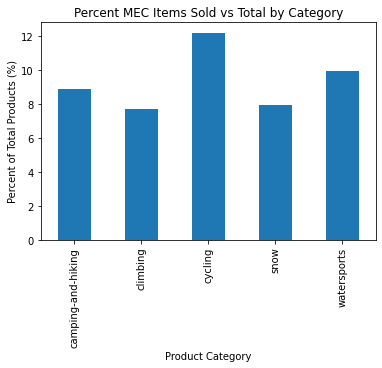

In [137]:
df_bar.plot(kind='bar', legend = None)

plt.xlabel('Product Category')
plt.ylabel('Percent of Total Products (%)')
plt.title("Percent MEC Items Sold vs Total by Category")

In [138]:
df_bar.index

Index(['camping-and-hiking', 'climbing', 'cycling', 'snow', 'watersports'], dtype='object', name='Product_category')

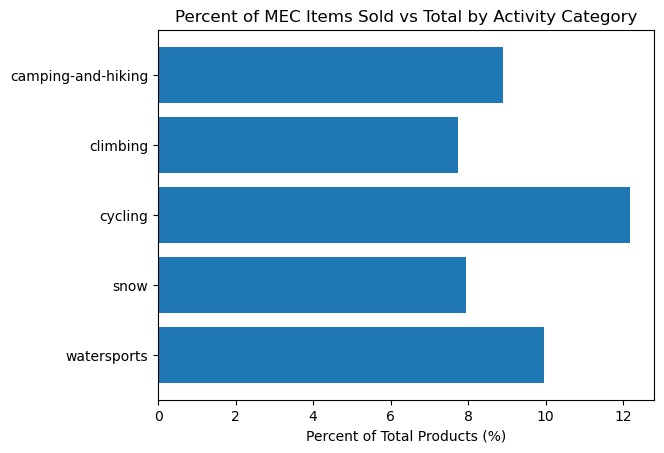

In [139]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
brand = df_bar.index
y_pos = np.arange(len(brand))
percent_total = df_bar['Percent_total']

ax.barh(y_pos, percent_total, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(brand)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Percent of Total Products (%)')
ax.set_title('Percent of MEC Items Sold vs Total by Activity Category')

plt.show()

In [140]:
# how does this compare with the highest % product sold at mec for that category?

In [141]:
df_multibar = Activity_list_top5[['Product_category', 'Brand', 'Percent_total']].set_index('Product_category')

df_multibar

,Brand,Percent_total
Product_category,,
camping-and-hiking,MEC,8.898305
camping-and-hiking,MSR,3.428351
camping-and-hiking,GSI,3.120185
camping-and-hiking,Black Diamond,2.580894
camping-and-hiking,Nite Ize,2.311248
climbing,Black Diamond,18.250951
climbing,Petzl,12.167300
climbing,MEC,7.731305
climbing,La Sportiva,5.576679


In [142]:
df5_CaH = df_multibar[df_multibar.index == 'camping-and-hiking']
df5_Climb = df_multibar[df_multibar.index == 'climbing']
df5_Cycle = df_multibar[df_multibar.index == 'cycling']
df5_Snow = df_multibar[df_multibar.index == 'snow']
df5_WS = df_multibar[df_multibar.index == 'watersports']

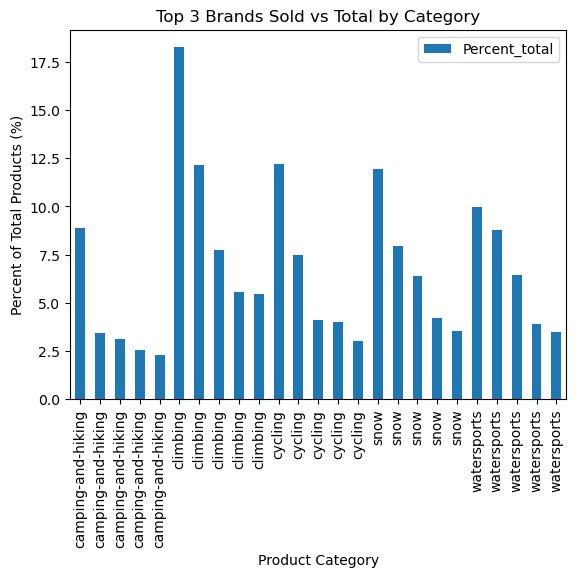

In [143]:
df_multibar.plot(kind='bar', tick_label = df_multibar['Brand'])


plt.xlabel('Product Category')
plt.ylabel('Percent of Total Products (%)')
plt.title("Top 3 Brands Sold vs Total by Category")
plt.legend()
# plt.set_xticklabels(df_multibar['Brand'])

# does not break down by category for each activtiy i.e. clothing, accessories, etc

In [144]:
values = np.array(df5_CaH['Brand'])
values

array(['MEC', 'MSR', 'GSI', 'Black Diamond', 'Nite Ize'], dtype=object)

Text(0.5, 1.0, 'Top 5 Brands vs Percent of Total Products for Camping and Hiking')

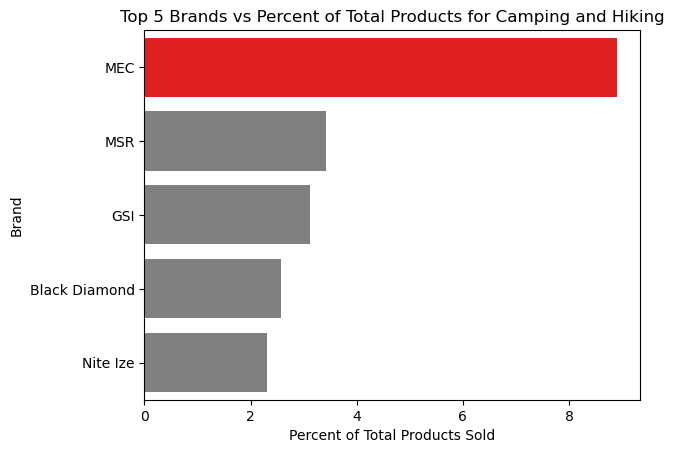

In [145]:
values = np.array(df5_CaH['Brand'])
clrs = ['red' if x == 'MEC' else 'gray' for x in values]

sns.barplot(x = df5_CaH['Percent_total'], y = df5_CaH['Brand'], palette = clrs) 
            #edgecolor = clrs)

plt.xlabel('Percent of Total Products Sold')
plt.title('Top 5 Brands vs Percent of Total Products for Camping and Hiking')

In [146]:
def bar_plot(df, Activity):
    values = np.array(df['Brand'])
    clrs = ['red' if x == 'MEC' else 'gray' for x in values]

    sns.barplot(x = df['Percent_total'], y = df['Brand'], palette = clrs) 

    plt.xlabel('Percent of Total Products Sold')
    plt.title(f'Top 5 Brands vs Percent of Total Products for {Activity}')

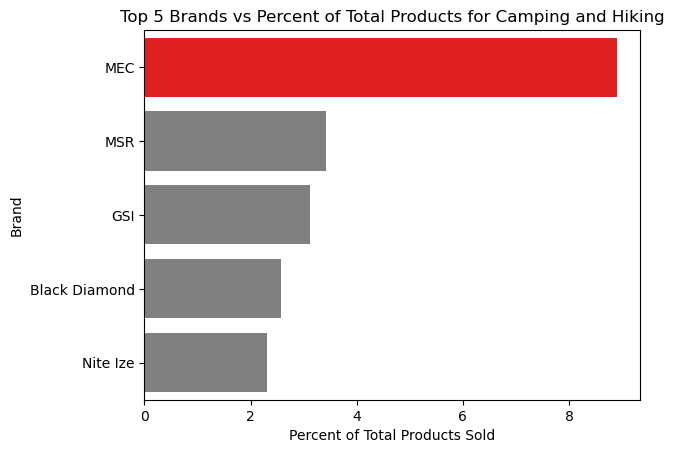

In [147]:
bar_plot(df5_CaH, 'Camping and Hiking')

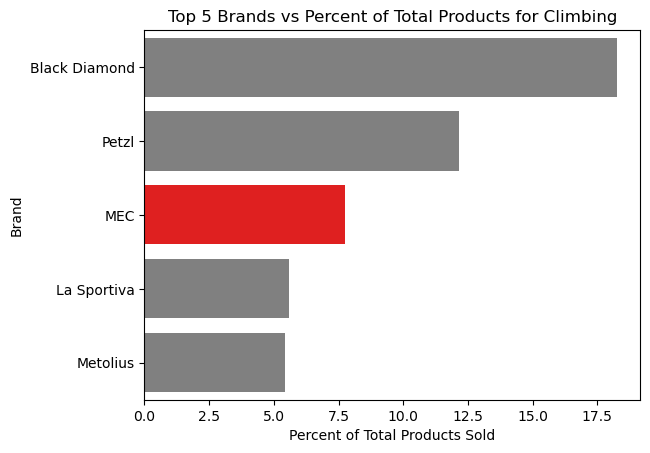

In [148]:
bar_plot(df5_Climb, 'Climbing')

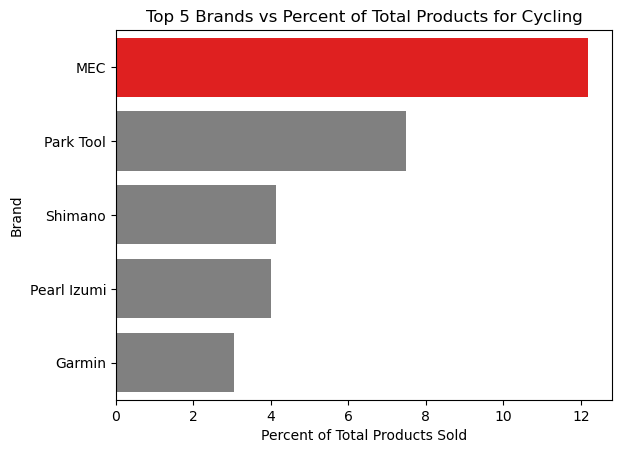

In [149]:
bar_plot(df5_Cycle, 'Cycling')

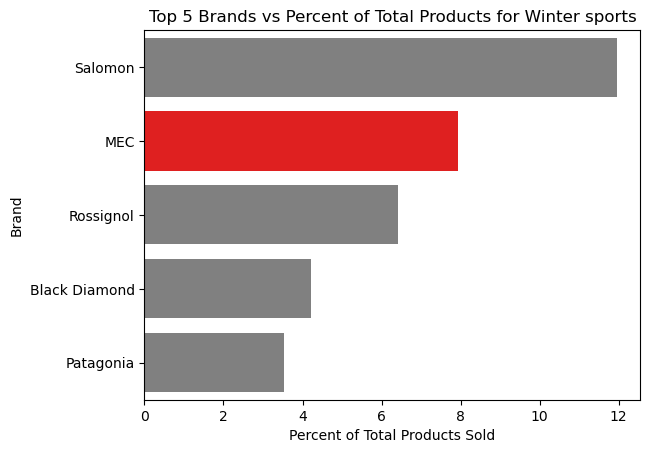

In [150]:
bar_plot(df5_Snow, 'Winter sports')

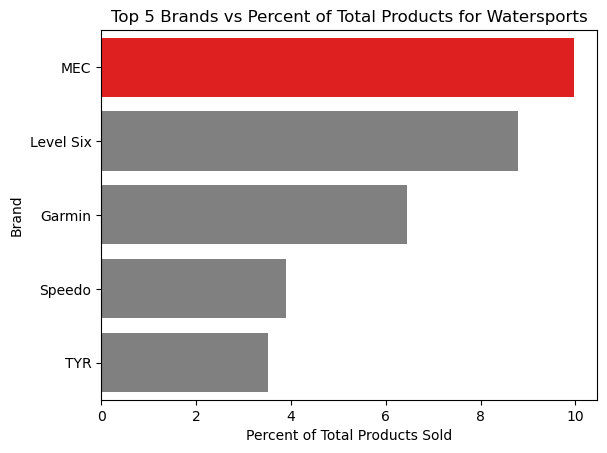

In [151]:
bar_plot(df5_WS, 'Watersports')

In [152]:
# compare price vs their relative position in that acitvity 

In [153]:
Activity_list_top5_updated

,Product_category,Brand,Count,Percent_total,Current_price
155,camping-and-hiking,MEC,231,8.898305,119.867706
156,camping-and-hiking,MSR,89,3.428351,181.797528
79,camping-and-hiking,GSI,81,3.120185,23.766049
18,camping-and-hiking,Black Diamond,67,2.580894,97.874478
174,camping-and-hiking,Nite Ize,60,2.311248,11.529167
4,climbing,Black Diamond,144,18.250951,96.593611
46,climbing,Petzl,96,12.167300,113.043750
34,climbing,MEC,61,7.731305,96.648852
33,climbing,La Sportiva,44,5.576679,311.383636
38,climbing,Metolius,43,5.449937,76.161860


In [172]:
df_activity = Activity_list_top5_updated.set_index('Product_category')

In [173]:
df_CaH5 = df_activity[df_activity.index == 'camping-and-hiking']
df_Climb5 = df_activity[df_activity.index == 'climbing']
df_Cycle5 = df_activity[df_activity.index == 'cycling']
df_Snow5 = df_activity[df_activity.index == 'snow']
df_WS5 = df_activity[df_activity.index == 'watersports']

In [174]:
df_CaH5 = df_CaH5.reset_index()
df_Climb5 


,Brand,Count,Percent_total,MSRP
Product_category,,,,
climbing,Black Diamond,144,18.250951,100.217871
climbing,Petzl,96,12.167300,113.043750
climbing,MEC,61,7.731305,111.506705
climbing,La Sportiva,44,5.576679,338.110713
climbing,Metolius,43,5.449937,76.394109


In [175]:
df_CaH5['MSRP'].tolist()

[132.01070536738393,
 182.90930979133225,
 23.76604938271608,
 107.36574761113654,
 11.52916666666667]

In [158]:
label1 = df_CaH5['Brand'].tolist()
price1 = df_CaH5['MSRP'].tolist()
per_total1 = df_CaH5['Percent_total'].tolist()
marker_list = ['.','o','v','^','<']

df_CaH5['MSRP'][df_CaH5['Brand'] == 'MEC']

0    119.867706
Name: Current_price, dtype: float64

In [176]:
def plot_pricevs_persold(df, activity):
    
    df.reset_index()
    
    label1 = df['Brand'].tolist()
    marker_list = ['.','o','v','^','<']
    
    
    for brand, marker in zip(label1, marker_list):
        if brand == 'MEC':
            price = df['MSRP'][df['Brand'] == brand]
            per_total = df['Percent_total'][df['Brand'] == brand]
            plt.plot(price, per_total, marker = 'X', markersize = 20, label = brand)        
        elif brand != 'MEC': 
            price = df['MSRP'][df['Brand'] == brand]
            per_total = df['Percent_total'][df['Brand'] == brand]
            plt.plot(price, per_total, marker, markersize = 10, label = brand)

    plt.xlabel('MSRP (CAD $)')
    plt.ylabel('Percent of Total Products Sold')
    plt.ylim(0, 20)
    plt.title(f"{activity} Avg Price vs Percent of Total Products Sold at MEC")
    plt.legend(loc = 'right')

    ax = plt.gca()
    plt.legend(bbox_to_anchor=(1.4, 0.7), bbox_transform=ax.transAxes);

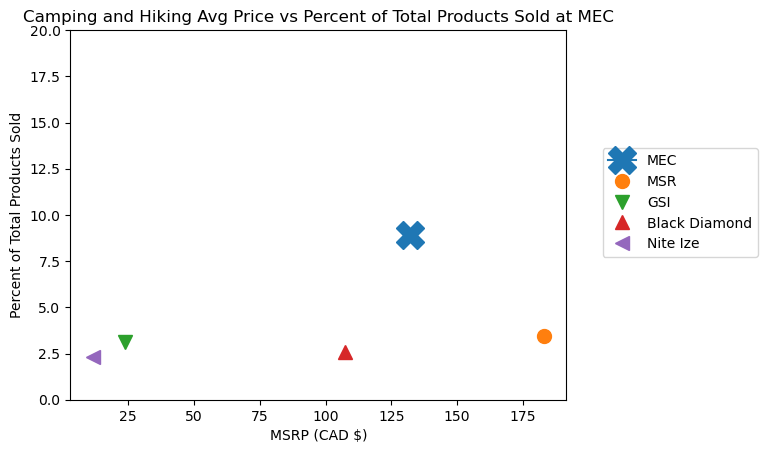

In [177]:
plot_pricevs_persold(df_CaH5, 'Camping and Hiking')

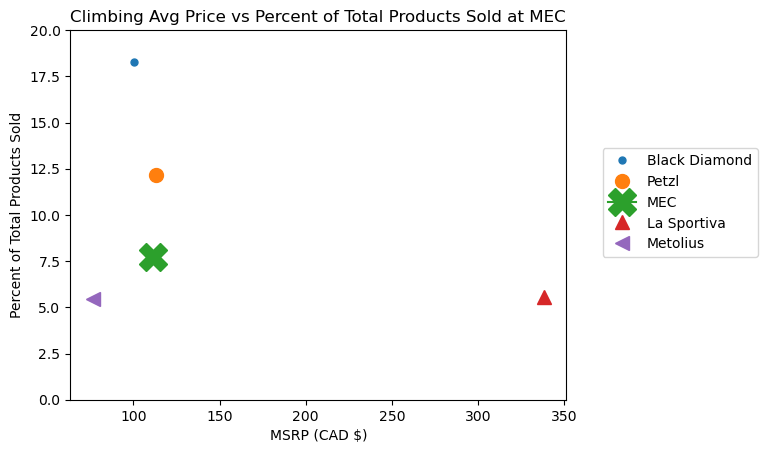

In [178]:
plot_pricevs_persold(df_Climb5, 'Climbing')

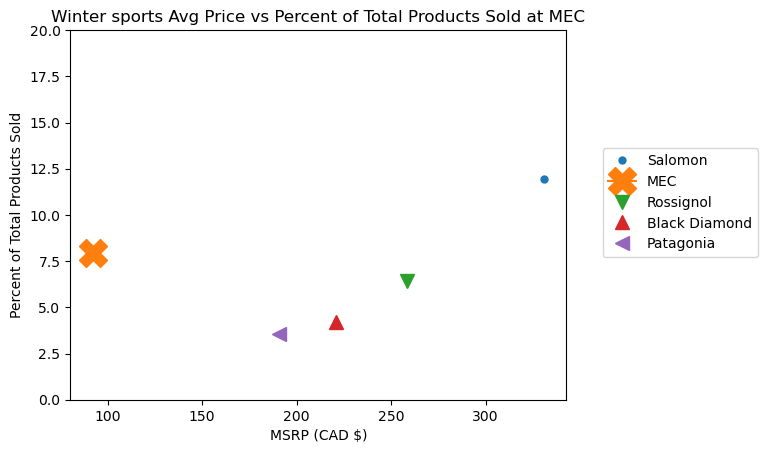

In [179]:
plot_pricevs_persold(df_Snow5, 'Winter sports')

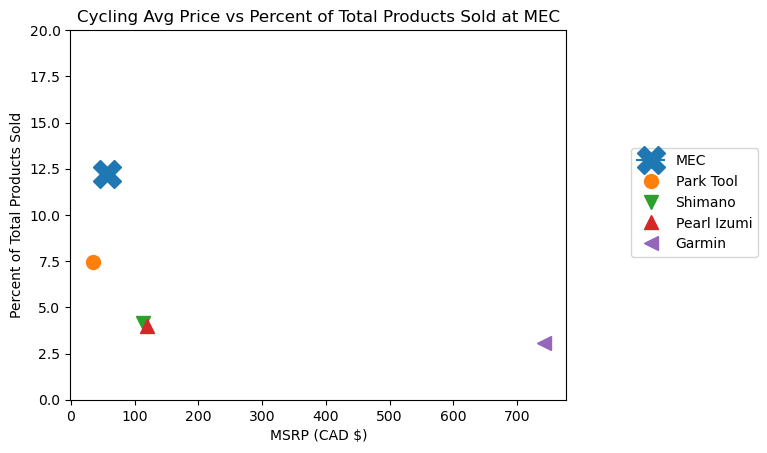

In [180]:
plot_pricevs_persold(df_Cycle5, 'Cycling')

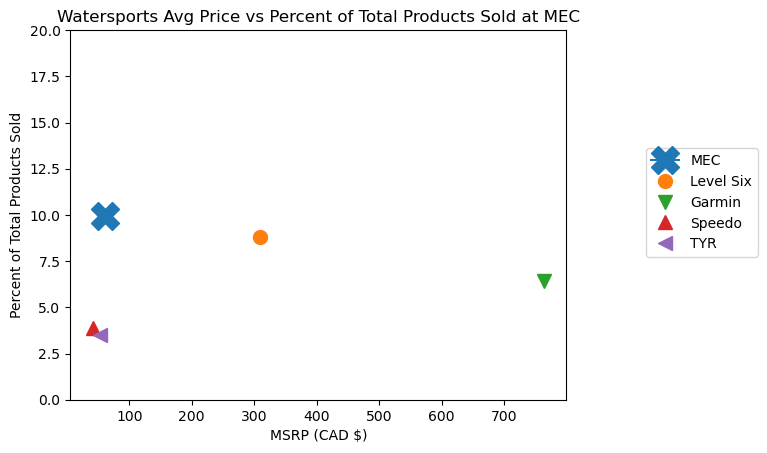

In [181]:
plot_pricevs_persold(df_WS5, 'Watersports')

In [ ]:
# activity category vs % of MEC products sold 
# webscrape from MEC but based on activity category

In [187]:
df_sc = pd.read_csv('activitysubcat_mec_info_2020-10-20.csv') 
df_sc = df_sc.rename(columns={'Unnamed: 0': 'Product_name'})

a = pd.to_numeric(df_sc['Current_price'], errors='coerce')
b = pd.to_numeric(df_sc['Discount'], errors='coerce')
c = pd.to_numeric(df_sc['Avg_review_outof5'], errors='coerce')
d = pd.to_numeric(df_sc['Num_reviews'], errors='coerce')
e = pd.to_datetime(df_sc['Date_retrieved'], errors='coerce')

df_sc['Current_price'] = a
df_sc['Discount'] = b
df_sc['Avg_review_outof5'] = c
df_sc['Num_reviews'] = d
df_sc['Date_retrieved'] = e

df_sc.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2454 entries, 0 to 2453
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Product_name       2446 non-null   object        
 1   Brand              2454 non-null   object        
 2   Current_price      2446 non-null   float64       
 3   Discount           2446 non-null   float64       
 4   Avg_review_outof5  2446 non-null   float64       
 5   Num_reviews        2446 non-null   float64       
 6   Product_category   2454 non-null   object        
 7   Subcategory        2454 non-null   object        
 8   Date_retrieved     2446 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 172.7+ KB


In [188]:
df_sc['Discount_percent'] = 1 - (df_sc[('Discount')] / 100)

df_sc['MSRP'] = df_sc['Current_price'] / df_sc[('Discount_percent')]

df_sc

,Product_name,Brand,Current_price,Discount,Avg_review_outof5,Num_reviews,Product_category,Subcategory,Date_retrieved,Discount_percent,MSRP
0,Aeropress Coffee & Espresso Maker,Aeropress,44.00,0.0,4.5,51.0,camping-and-hiking,kitchen-and-hydration,2020-10-20,1.0,44.00
1,Yeti Rambler 20 Vacuum Mag Slider Tumbler,Yeti,40.00,0.0,4.7,29586.0,camping-and-hiking,kitchen-and-hydration,2020-10-20,1.0,40.00
2,MSR PocketRocket 2 Stove,MSR,59.95,0.0,4.5,28.0,camping-and-hiking,kitchen-and-hydration,2020-10-20,1.0,59.95
3,Snow Peak Field Oven,Snow Peak,272.93,30.0,0.0,0.0,camping-and-hiking,kitchen-and-hydration,2020-10-20,0.7,389.90
4,Ooni Koda Pizza Oven,Ooni,438.95,0.0,4.5,6.0,camping-and-hiking,kitchen-and-hydration,2020-10-20,1.0,438.95
...,...,...,...,...,...,...,...,...,...,...,...
2449,Rab Expedition 1000 -30C Down Sleeping Bag - U...,Rab,949.95,0.0,0.0,0.0,camping-and-hiking,sleeping-bags-and-pads,2020-10-20,1.0,949.95
2450,Therm-a-Rest WingLock Valve Repair Kit,Therm-a-Rest,19.95,0.0,0.0,0.0,camping-and-hiking,sleeping-bags-and-pads,2020-10-20,1.0,19.95
2451,SEA TO SUMMIT Comfort Light Insulated Sleeping...,SEA,259.95,0.0,0.0,0.0,camping-and-hiking,sleeping-bags-and-pads,2020-10-20,1.0,259.95
2452,The North Face Eco Trail Down -7C Sleeping Bag...,The North Face,279.99,0.0,0.0,0.0,camping-and-hiking,sleeping-bags-and-pads,2020-10-20,1.0,279.99


In [189]:
for num in list(df_sc[df_sc['Product_name'].isnull()].index):
    df_sc = df_sc.drop(index = num)

In [194]:
df_sc.set_index('Subcategory').drop(columns ={'Date_retrieved', 'Product_name'})

,Brand,Current_price,Discount,Avg_review_outof5,Num_reviews,Product_category,Discount_percent,MSRP
Subcategory,,,,,,,,
kitchen-and-hydration,Aeropress,44.00,0.0,4.5,51.0,camping-and-hiking,1.0,44.00
kitchen-and-hydration,Yeti,40.00,0.0,4.7,29586.0,camping-and-hiking,1.0,40.00
kitchen-and-hydration,MSR,59.95,0.0,4.5,28.0,camping-and-hiking,1.0,59.95
kitchen-and-hydration,Snow Peak,272.93,30.0,0.0,0.0,camping-and-hiking,0.7,389.90
kitchen-and-hydration,Ooni,438.95,0.0,4.5,6.0,camping-and-hiking,1.0,438.95
...,...,...,...,...,...,...,...,...
sleeping-bags-and-pads,Rab,949.95,0.0,0.0,0.0,camping-and-hiking,1.0,949.95
sleeping-bags-and-pads,Therm-a-Rest,19.95,0.0,0.0,0.0,camping-and-hiking,1.0,19.95
sleeping-bags-and-pads,SEA,259.95,0.0,0.0,0.0,camping-and-hiking,1.0,259.95


In [227]:
df_sc.reset_index()

,index,Product_name,Brand,Current_price,Discount,Avg_review_outof5,Num_reviews,Product_category,Subcategory,Date_retrieved,Discount_percent,MSRP
0,0,Aeropress Coffee & Espresso Maker,Aeropress,44.00,0.0,4.5,51.0,camping-and-hiking,kitchen-and-hydration,2020-10-20,1.0,44.00
1,1,Yeti Rambler 20 Vacuum Mag Slider Tumbler,Yeti,40.00,0.0,4.7,29586.0,camping-and-hiking,kitchen-and-hydration,2020-10-20,1.0,40.00
2,2,MSR PocketRocket 2 Stove,MSR,59.95,0.0,4.5,28.0,camping-and-hiking,kitchen-and-hydration,2020-10-20,1.0,59.95
3,3,Snow Peak Field Oven,Snow Peak,272.93,30.0,0.0,0.0,camping-and-hiking,kitchen-and-hydration,2020-10-20,0.7,389.90
4,4,Ooni Koda Pizza Oven,Ooni,438.95,0.0,4.5,6.0,camping-and-hiking,kitchen-and-hydration,2020-10-20,1.0,438.95
...,...,...,...,...,...,...,...,...,...,...,...,...
2441,2449,Rab Expedition 1000 -30C Down Sleeping Bag - U...,Rab,949.95,0.0,0.0,0.0,camping-and-hiking,sleeping-bags-and-pads,2020-10-20,1.0,949.95
2442,2450,Therm-a-Rest WingLock Valve Repair Kit,Therm-a-Rest,19.95,0.0,0.0,0.0,camping-and-hiking,sleeping-bags-and-pads,2020-10-20,1.0,19.95
2443,2451,SEA TO SUMMIT Comfort Light Insulated Sleeping...,SEA,259.95,0.0,0.0,0.0,camping-and-hiking,sleeping-bags-and-pads,2020-10-20,1.0,259.95
2444,2452,The North Face Eco Trail Down -7C Sleeping Bag...,The North Face,279.99,0.0,0.0,0.0,camping-and-hiking,sleeping-bags-and-pads,2020-10-20,1.0,279.99


In [221]:
df_sc_total_count = df_sc.groupby('Subcategory').agg('count').sort_values('Product_name',ascending=False).reset_index()

KaH_total = df_sc_total_count[['Product_name']][df_sc_total_count['Subcategory'] == 'kitchen-and-hydration']
KaH_total.sum()

Product_name    666
dtype: int64

In [220]:


KaH= df_sc[df_sc['Subcategory'] == 'kitchen-and-hydration'][['Brand', 'Product_name','Subcategory']].groupby(['Brand'], as_index=False)\
.agg('count').sort_values('Product_name',ascending=False)

KaH = KaH[KaH['Brand'] == 'MEC']

KaH_PerTotal = KaH[['Product_name']] / KaH_total.sum()*100
KaH_merged = pd.merge(KaH, KaH_PerTotal, left_index=True, right_index=True, how = 'outer')
KaH_merged = KaH_merged.rename(columns={'Product_name_x':'Count','Product_name_y':'Percent_total' })
KaH_merged = pd.concat([KaH, KaH_PerTotal], axis = 1)

KaH_merged

,Brand,Product_name,Subcategory,Product_name
46,MEC,1,1,0.15015


In [247]:
Product_subcat_list = list(df_sc['Subcategory'].unique())

Product_subcat_list.sort()

print(len(Product_subcat_list))
Product_subcat_list


9


['camping-tents-tarps-and-bivies',
 'electronics',
 'health-and-safety',
 'hiking-clothing',
 'hiking-footwear',
 'kitchen-and-hydration',
 'packs',
 'sleeping-bags-and-pads',
 'tools-lighting-and-accessories']

In [244]:
def get_MEC_Percent(df, product_activity_list):
    
    df_total_count = df.groupby('Subcategory').agg('count').sort_values('Product_name',ascending=False).reset_index()

#    activity_total.sum()
    
    activity_list = []
    
    for i in product_activity_list:
        activity_total = df_total_count[['Product_name']][df_total_count['Subcategory'] == f'{i}']

        activity = df[df['Subcategory'] == f'{i}'][['Brand', 'Product_name','Subcategory']].groupby(['Subcategory','Brand'], as_index=False)\
        .agg('count').sort_values('Product_name',ascending=False).iloc[:100]
    
        activity = activity[activity['Brand'] == 'MEC']
    
        activity_PerTotal = activity[['Product_name']] / activity_total.sum()*100
        activity_merged = pd.merge(activity, activity_PerTotal, left_index=True, right_index=True, how = 'outer')
        activity_merged = activity_merged.rename(columns={'Product_name_x':'Count','Product_name_y':'Percent_total' })    
    
        activity_list.append(activity_merged)
        
    
    activity_df = pd.concat(activity_list)      
    
    return activity_df

In [257]:
MEC_subcat = get_MEC_Percent(df_sc, Product_subcat_list)
df_sc_MEC = MEC_subcat.sort_values('Subcategory')

df_sc_MEC

,Subcategory,Brand,Count,Percent_total
9,camping-tents-tarps-and-bivies,MEC,21,17.647059
18,electronics,MEC,1,0.628931
27,health-and-safety,MEC,2,1.069519
14,hiking-clothing,MEC,92,28.048780
21,hiking-footwear,MEC,5,1.428571
46,kitchen-and-hydration,MEC,1,0.150150
11,packs,MEC,37,15.040650
3,sleeping-bags-and-pads,MEC,58,51.785714
23,tools-lighting-and-accessories,MEC,8,2.867384


In [260]:
def bar_plot_subcat(df):
    values = np.array(df['Brand'])

    sns.barplot(x = df['Percent_total'], y = df['Subcategory']) 

    plt.xlabel('Percent of Total Products Sold (%)')
    plt.title(f'Percent of MEC Products Sold vs by Camping Category ')

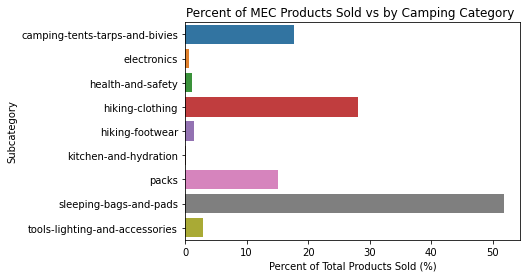

In [261]:
bar_plot_subcat(df_sc_MEC)

In [267]:
def get_mec_info(df, brand, column_name):
    return df[df['Brand'] == brand][column_name]

In [262]:
def df_stats(df, subcat):

    df_sc1 = df[df['Subcategory'] == f'{subcat}'].groupby('Brand').agg({'Current_price': ['count', 'mean', 'min', 'max'],
                             'Discount': ['mean', 'min', 'max'],
                             'Avg_review_outof5': ['mean', 'min', 'max'],
                             'Num_reviews': ['mean', 'min', 'max']}).sort_values(('Current_price', 'count'), ascending=False)

    df_sc1 = df_sc1.reset_index()

    df_sc1['Discount_percent'] = 1 - (df_sc1[('Discount','mean')] / 100)

    df_sc1['MSRP'] = df_sc1[('Current_price','mean')] / df_sc1[('Discount_percent')]

    return df_sc1

In [275]:
df_sc1 = df_stats(df_sc, 'sleeping-bags-and-pads')
df_sc2 = df_stats(df_sc, 'camping-tents-tarps-and-bivies')

df_sc2

Brand Current_price                                  Discount  \
                             count         mean      min      max       mean   
0                MSR            23   426.256087     6.95  5699.95   2.608696   
1                MEC            21   225.133333     0.50   739.95   4.523810   
2          Big Agnes            16   339.949375    51.94   694.95   1.625000   
3     The North Face             8  1226.235000    59.99  7149.99   0.000000   
4                Rab             8   136.200000    94.95   194.95   0.000000   
5          Coghlan's             7     2.557143     0.45     5.95   0.000000   
6           Gear Aid             6     9.950000     4.95    13.95   0.000000   
7                ENO             5   116.950000    44.95   299.95   0.000000   
8             Eureka             4   364.950000    99.95   689.95   0.000000   
9             Easton             3     1.583333     1.25     1.75   0.000000   
10          Nite Ize             3     7.883333     5.95    10.75   0.000000   
11           Bulldog             2     1.875000     1.75     2.00   0.000000   
12        TearRepair             2     9.750000     9.75     9.75   0.000000   
13  Outdoor Research             2   184.950000   119.95   249.95   0.000000   
14                TC             1     1.950000     1.95     1.95   0.000000   
15      Therm-a-Rest             1   254.950000   254.95   254.95  25.000000   
16             Tepui             1  2959.960000  2959.96  2959.96  20.000000   
17            Mammut             1     2.000000     2.00     2.00   0.000000   
18           OnSight             1    42.500000    42.50    42.50   0.000000   
19          Metolius             1   659.950000   659.95   659.95   0.000000   
20          Hennessy             1   189.950000   189.95   189.95   0.000000   
21               DAC             1     1.950000     1.95     1.95   0.000000   
22             Thule             1  2249.950000  2249.95  2249.95   0.000000   

               Avg_review_outof5           Num_reviews               \
     min   max              mean  min  max        mean   min    max   
0    0.0  30.0          1.239130  0.0  5.0    1.086957   0.0    7.0   
1    0.0  45.0          3.266667  0.0  5.0    6.333333   0.0   20.0   
2    0.0  26.0          0.312500  0.0  4.0    0.125000   0.0    1.0   
3    0.0   0.0          1.562500  0.0  5.0    0.875000   0.0    3.0   
4    0.0   0.0          2.850000  0.0  5.0    2.250000   0.0    8.0   
5    0.0   0.0          2.957143  1.0  5.0    1.857143   1.0    4.0   
6    0.0   0.0          3.600000  2.0  4.6   81.666667   3.0  450.0   
7    0.0   0.0          1.000000  0.0  5.0    0.200000   0.0    1.0   
8    0.0   0.0          2.975000  0.0  4.3    3.750000   0.0    7.0   
9    0.0   0.0          5.000000  5.0  5.0    1.000000   1.0    1.0   
10   0.0   0.0          4.400000  3.4  5.0    4.333333   3.0    5.0   
11   0.0   0.0          4.300000  4.1  4.5    5.500000   4.0    7.0   
12   0.0   0.0          3.700000  3.0  4.4    6.000000   2.0   10.0   
13   0.0   0.0          1.800000  0.0  3.6    3.500000   0.0    7.0   
14   0.0   0.0          3.800000  3.8  3.8    5.000000   5.0    5.0   
15  25.0  25.0          0.000000  0.0  0.0    0.000000   0.0    0.0   
16  20.0  20.0          0.000000  0.0  0.0    0.000000   0.0    0.0   
17   0.0   0.0          2.800000  2.8  2.8    5.000000   5.0    5.0   
18   0.0   0.0          4.300000  4.3  4.3   11.000000  11.0   11.0   
19   0.0   0.0          0.000000  0.0  0.0    0.000000   0.0    0.0   
20   0.0   0.0          4.800000  4.8  4.8   57.000000  57.0   57.0   
21   0.0   0.0          4.700000  4.7  4.7    9.000000   9.0    9.0   
22   0.0   0.0          5.000000  5.0  5.0    2.000000   2.0    2.0   

   Discount_percent         MSRP  
                                  
0          0.973913   437.673661  
1          0.954762   235.800499  
2          0.983750   345.564803  
3          1.000000  1226.235000  
4          1.000000   136.20

In [269]:
def plot_rating_Actsc(df, product_type, markersize_rev = 10, ymin = 0, ymax = 5.5 ):
    
    brand_list_rev= []
    marker_list = ['.','o','v','^','<','>','x','X','+','*','1','2','3','4','8','H','h','p','P','d','D','s','|','_']
    
    for i in df['Brand'][df[('Num_reviews','mean')] >= 0]:
        brand_list_rev.append(i)
 
    if len(brand_list_rev) > 15:
        brand_list_rev = brand_list_rev[:15]
    else:
        pass
    
    brand_list_rev.sort()
    print(len(brand_list_rev))
    marker_list_rev = marker_list[:(len(brand_list_rev))]
    

    for brand,marker in zip(brand_list_rev, marker_list_rev):
        price = get_mec_info(df, brand, 'MSRP')
        avg_review = get_mec_info(df, brand, ('Avg_review_outof5', 'mean'))
        plt.plot(price, avg_review, marker, markersize = markersize_rev, label = brand)    

    plt.xlabel('MSRP (CAD $)')
    plt.ylabel('Avg Review Out of 5')
    plt.ylim(ymin, ymax)
    plt.title(f"{product_type} Avg Current Price vs Avg Review Out of 5 for\n Brands Sold at MEC with at least 2 Reviews per Products")
    plt.legend(loc = 'right')

    ax = plt.gca()
    plt.legend(bbox_to_anchor=(1.1, 1.1), bbox_transform=ax.transAxes);

12


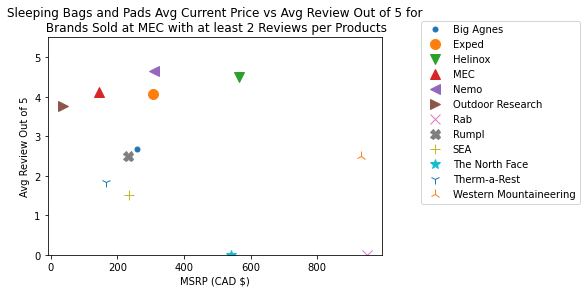

In [270]:
plot_rating_Actsc(df_sc1, 'Sleeping Bags and Pads')

15


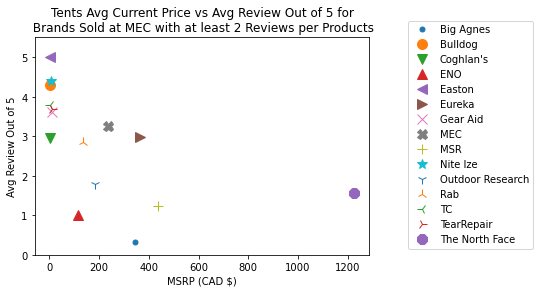

In [273]:
plot_rating_Actsc(df_sc2, 'Tents')

{'whiskers': [<matplotlib.lines.Line2D at 0x269b0787b20>,
 'caps': [<matplotlib.lines.Line2D at 0x269b0787520>,
 'boxes': [<matplotlib.lines.Line2D at 0x269b17eaaf0>],
 'medians': [<matplotlib.lines.Line2D at 0x269b177d130>],
 'fliers': [<matplotlib.lines.Line2D at 0x269b177d190>],
 'means': []}

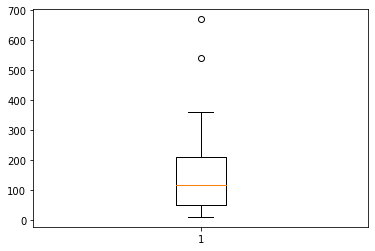

In [300]:
plt.boxplot(df_sc['MSRP'][df_sc['Brand'] == 'MEC'][df_sc['Subcategory'] == 'sleeping-bags-and-pads'])

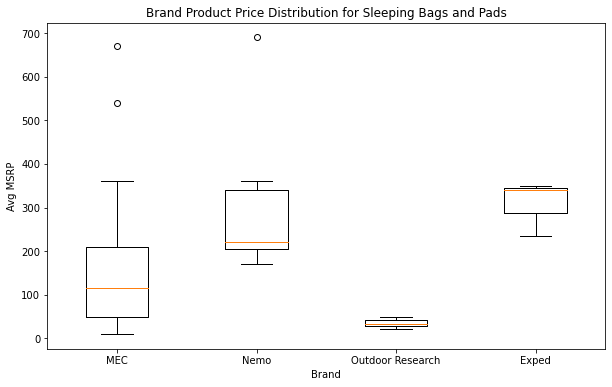

In [365]:
a1 = df_sc['MSRP'][df_sc['Brand'] == 'MEC'][df_sc['Subcategory'] == 'sleeping-bags-and-pads']
a2 = df_sc['MSRP'][df_sc['Brand'] == 'Nemo'][df_sc['Subcategory'] == 'sleeping-bags-and-pads']
a3 = df_sc['MSRP'][df_sc['Brand'] == 'Outdoor Research'][df_sc['Subcategory'] == 'sleeping-bags-and-pads']
a4 = df_sc['MSRP'][df_sc['Brand'] == 'Exped'][df_sc['Subcategory'] == 'sleeping-bags-and-pads']

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.boxplot([a1,a2, a3, a4], labels = ['MEC', 'Nemo', 'Outdoor Research', 'Exped'])

ax1.set_title('Brand Product Price Distribution for Sleeping Bags and Pads')
ax1.set_xlabel('Brand')
ax1.set_ylabel('Avg MSRP');

In [357]:
def plot_boxplots(yaxis, brand_list, product_subcat, title_cat):

    list_of_boxplots = []
    for i in brand_list:
        a1 = df_sc[yaxis][df_sc['Brand'] == i][df_sc['Subcategory'] == product_subcat]
        list_of_boxplots.append(a1)

    fig, ax1 = plt.subplots(figsize=(10, 6))

    ax1.boxplot(list_of_boxplots, labels = brand_list)

    ax1.set_title(f'Brand Product Price Distribution for {title_cat}')
    ax1.set_xlabel('Brand')
    ax1.set_ylabel(f'Avg {yaxis}');

In [339]:
my_list = ['MEC', 'Eureka', 'Gear Aid', "Coghlan's"]

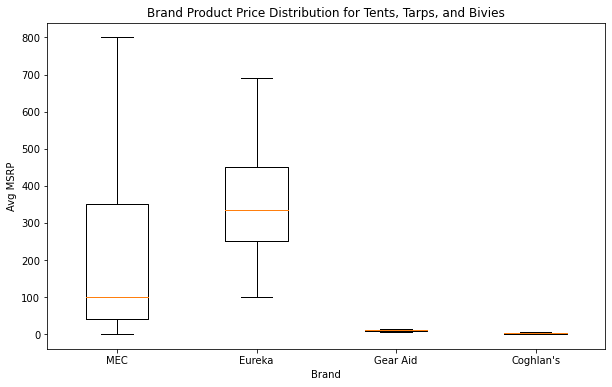

In [358]:
plot_boxplots('MSRP', my_list, 'camping-tents-tarps-and-bivies', 'Tents, Tarps, and Bivies')

## top 5 brands in camping and hiking boxplot

In [355]:
my_list2 = ['MEC', 'MSR', 'GSI', 'Black Diamond', 'Nite Ize', 'The North Face']

In [363]:
def plot_boxplots_cat(yaxis, brand_list, product_cat, title_cat):

    list_of_boxplots = []
    for i in brand_list:
        a1 = df[yaxis][df['Brand'] == i][df['Product_category'] == product_cat]
        list_of_boxplots.append(a1)

    fig, ax1 = plt.subplots(figsize=(10, 6))

    ax1.boxplot(list_of_boxplots, labels = brand_list)

    ax1.set_title(f'Brand Product Price Distribution for {title_cat}')
    ax1.set_xlabel('Brand')
    ax1.set_ylabel(f'Avg {yaxis}')
    ax1.set_ylim(0, 900);

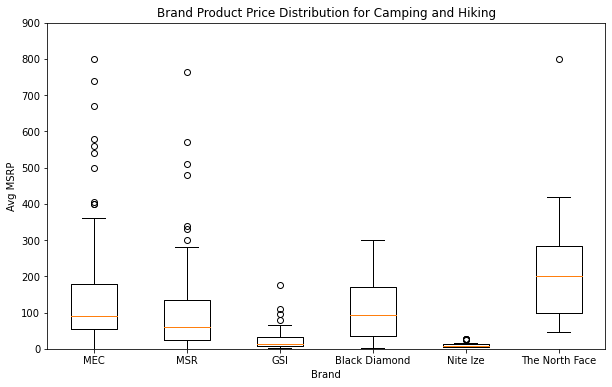

In [364]:
plot_boxplots_cat('MSRP', my_list2, 'camping-and-hiking', 'Camping and Hiking')